In [1]:
from models import DomainModel, LearnerModel, PedagogyModel
from controller import Controller

c:\Users\Administrator\miniconda3\envs\its-enem\Lib\site-packages\pydantic\_internal\_config.py:373: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [2]:
# Mock questions data (could be loaded from a file)
questions = [
    {
        "id": "q1",
        "correct": "A",
        "difficulty": "easy",
        "topics": {
            "Programação": [
                ["Fundamentos", "Estrutura de dados", "Linguagens de Programação"],
                ["Fundamentos", "Estrutura de dados", "Paradigmas de Programação"]
            ]
        }
    },
    {
        "id": "q2",
        "correct": "B",
        "difficulty": "medium",
        "topics": {
            "Programação": [
                ["Fundamentos", "Estrutura de dados", "Linguagens de Programação"]
            ],
            "Inteligência Artificial": [
                ["Aprendizado de Máquina", "Processamento de Linguagem Natural"]
            ]
        }
    },
    {
        "id": "q3",
        "correct": "C",
        "difficulty": "hard",
        "topics": {
            "Banco de Dados": [
                ["Modelagem de Dados", "Linguagens de Consulta"],
                ["Modelagem de Dados", "Administração de Banco de Dados"]
            ],
            "Engenharia de Software": [
                ["Metodologias", "Qualidade de Software"]
            ]
        }
    },
    {
        "id": "q4",
        "correct": "D",
        "difficulty": "easy",
        "topics": {
            "Sistemas Operacionais": [
                ["Virtualização", "Redes e Segurança"]
            ]
        }
    },
    {
        "id": "q5",
        "correct": "E",
        "difficulty": "medium",
        "topics": {
            "Desenvolvimento Web": [
                ["Frontend", "Backend"],
                ["Backend", "DevOps"]
            ]
        }
    }
]

Domain Model Hierarchy:
Computação
  Programação
    Fundamentos
      - Algoritmos
      - Estruturas de Controle (If, Else, Loops)
      - Funções e Procedimentos
    Estruturas de Dados
      - Arrays e Listas
      - Pilhas e Filas
      - Árvores e Grafos
    Paradigmas de Programação
      - Programação Orientada a Objetos
      - Programação Funcional
      - Programação Concorrente
    Linguagens de Programação
      - Python
      - Java
      - C++
      - JavaScript
  Sistemas Operacionais
    Conceitos Básicos
      - Gerenciamento de Processos
      - Gerenciamento de Memória
      - Sistemas de Arquivos
    Virtualização
      - Máquinas Virtuais
      - Containers (Docker, Kubernetes)
    Redes e Segurança
      - Protocolos de Comunicação (TCP/IP, HTTP)
      - Segurança de Redes
      - Criptografia
  Banco de Dados
    Modelagem de Dados
      - Modelos Relacionais
      - Modelos Não Relacionais (NoSQL)
    Linguagens de Consulta
      - SQL
      - Linguagem de Cons

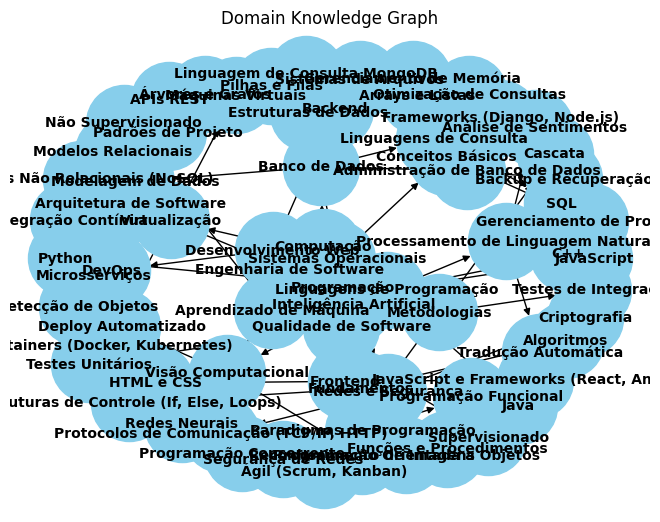

In [ ]:
# Initialize models and controller
domain_model = DomainModel('model/domain.yml')
print("Domain Model Hierarchy:")
domain_model.print_domain()
domain_model.plot()

In [4]:
pedagogy_model = PedagogyModel('model/pedagogy.yml')
pedagogy_model.print_rules()

Pedagogical Rules:
  Rule: Relacionamento para baixo desempenho em tópicos
    Condition: performance.topics[topic].percent_correct < 50.0
    Action: {'feedback_relacionamento[topic]': 1}

  Rule: Competência para alto desempenho em tópicos
    Condition: performance.topics[topic].percent_correct > 80.0
    Action: {'feedback_competência[topic]': 1}

  Rule: Autonomia para desempenho moderado em tópicos
    Condition: performance.topics[topic].percent_correct >= 50.0 AND performance.topics[topic].percent_correct <= 80.0
    Action: {'feedback_autonomia[topic]': 1}

  Rule: Exploração para alto desempenho em tópicos
    Condition: performance.topics[topic].percent_correct > 90.0
    Action: {'feedback_exploração[topic]': 1}



In [5]:
controller = Controller(domain_model, pedagogy_model, questions)

# Example usage with a single learner
learner = LearnerModel(id="learner_001", answers={"q1": "A", "q2": "B", "q3": "C", "q4": "D", "q5": "E"})
learner = controller.process_learner(learner)
print("\nLearner Performance:")
learner.print_performance()


Learner Performance:
Performance for learner_001:
  Topics:
    Linguagens de Programação: {'total_questions': 2, 'points': 3, 'percent_correct_easy_questions': 100.0, 'percent_correct_medium_questions': 100.0, 'percent_correct_hard_questions': 0.0, 'percent_correct': 100.0}
    Paradigmas de Programação: {'total_questions': 1, 'points': 1, 'percent_correct_easy_questions': 100.0, 'percent_correct_medium_questions': 0.0, 'percent_correct_hard_questions': 0.0, 'percent_correct': 100.0}
    Processamento de Linguagem Natural: {'total_questions': 1, 'points': 2, 'percent_correct_easy_questions': 0.0, 'percent_correct_medium_questions': 100.0, 'percent_correct_hard_questions': 0.0, 'percent_correct': 100.0}
    Linguagens de Consulta: {'total_questions': 1, 'points': 3, 'percent_correct_easy_questions': 0.0, 'percent_correct_medium_questions': 0.0, 'percent_correct_hard_questions': 100.0, 'percent_correct': 100.0}
    Administração de Banco de Dados: {'total_questions': 1, 'points': 3, 'p

In [6]:
# Generate and process a random learner
learner = controller.generate_learners(1)[0]
learner = controller.process_learner(learner)

# Apply pedagogical rules to check feedback flags
feedback_flags = controller.apply_pedagogy(learner)
report = controller.generate_report(feedback_flags, learner.id)
print(report)

Recommendation Report for learner_1

**Your Strengths:**
- No specific strengths identified yet. Keep working!

**Opportunities for Growth:**
- No specific opportunities for growth at this time.

**Areas to Focus On:**
- All areas are performing satisfactorily.



In [7]:
# Generate mock reports for multiple learners
print("\nGenerating Mock Reports:")
controller.generate_mock_reports(5)


Generating Mock Reports:
    Report for learner_1:
Recommendation Report for learner_1

**Your Strengths:**
- No specific strengths identified yet. Keep working!

**Opportunities for Growth:**
- No specific opportunities for growth at this time.

**Areas to Focus On:**
- All areas are performing satisfactorily.


    Report for learner_2:
Recommendation Report for learner_2

**Your Strengths:**
- No specific strengths identified yet. Keep working!

**Opportunities for Growth:**
- No specific opportunities for growth at this time.

**Areas to Focus On:**
- All areas are performing satisfactorily.


    Report for learner_3:
Recommendation Report for learner_3

**Your Strengths:**
- No specific strengths identified yet. Keep working!

**Opportunities for Growth:**
- No specific opportunities for growth at this time.

**Areas to Focus On:**
- All areas are performing satisfactorily.


    Report for learner_4:
Recommendation Report for learner_4

**Your Strengths:**
- No specific strengt